In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline
# このコードを実行すると、出力結果が省略されないらしい。
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: unset; }</style>"))

C:\Users\Owner\AppData\Local\Temp\ipykernel_3164\889567203.py:3: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


### この数式を描画してみたい

$$ x_{n+1} = x_n - (x_n cos\theta - y_n sin\theta) / r_n $$

$$ y_{n+1} = y_n - (x_n sin\theta - y_n cos\theta) / r_n $$

$$ r_n = \sqrt{{x_n}^2 + {y_2}^2}$$

In [46]:
def fuction2d(init, theta):
    '''
    init : 初期値
    theta : Θ
    '''
    x = [init]
    y = [init]
    r = np.array([np.sqrt(np.square(x[-1]) + np.square(y[-1]))])
    for i in range(1000):
        x.append(x[-1] -(x[-1] * np.cos(theta) - y[-1] * np.sin(theta))/r[np.size(r)-1])
        y.append(y[-1] -(x[-1] * np.sin(theta) + y[-1] * np.cos(theta))/r[np.size(r)-1])
        r = np.insert(r, np.size(r), np.sqrt(np.square(x[-1]) + np.square(y[-1])))
    
    return (x[-100], y[-100], r[-100]) # 後ろから100番目以降の配列を取得（収束済みと踏んでいる）

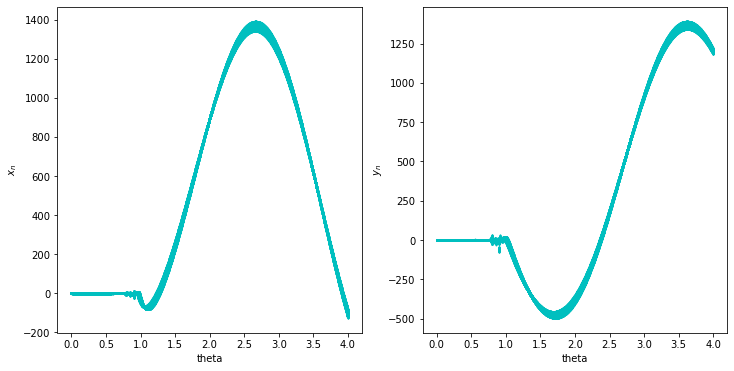

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
for theta in np.linspace(0, 4.0, 2000):
    x, y, r = fuction2d(400, theta)
    # 後ろから50番目以降をプロットする
    axes[0].plot([theta] * len(x[-50:]), x[-50:], "c.", markersize=1.7)
    axes[1].plot([theta] * len(y[-50:]), y[-50:], "c.", markersize=1.7)

axes[0].set_xlabel("theta")
axes[1].set_xlabel("theta")
axes[0].set_ylabel("$x_n$")
axes[1].set_ylabel("$y_n$")
plt.show()

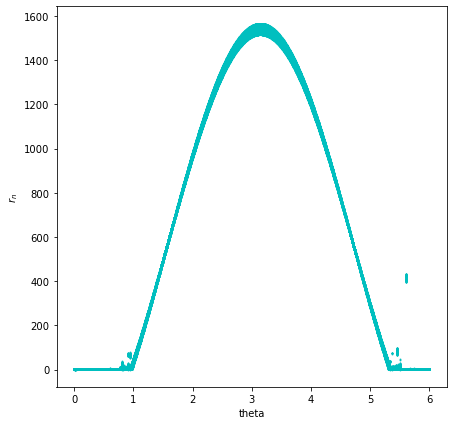

In [49]:
plt.figure(figsize=(7, 7))
for theta in np.linspace(0, 6.0, 2000):
    x, y, r = fuction2d(400, theta)
    # 後ろから50番目以降をプロットする
    plt.plot([theta] * len(r[-50:]), r[-50:], "c.", markersize=1.7) 

plt.xlabel("theta")
plt.ylabel("$r_n$")
plt.show()

### ???本当にこんな形になるの..??
* かなり疑問なので、とりあえずthetaを固定して動かしてみる。

C:\Users\Owner\AppData\Local\Temp\ipykernel_3164\1640003324.py:10: RuntimeWarning: invalid value encountered in true_divide
  x.append(x[-1] -(x[-1] * np.cos(theta) - y[-1] * np.sin(theta))/r)


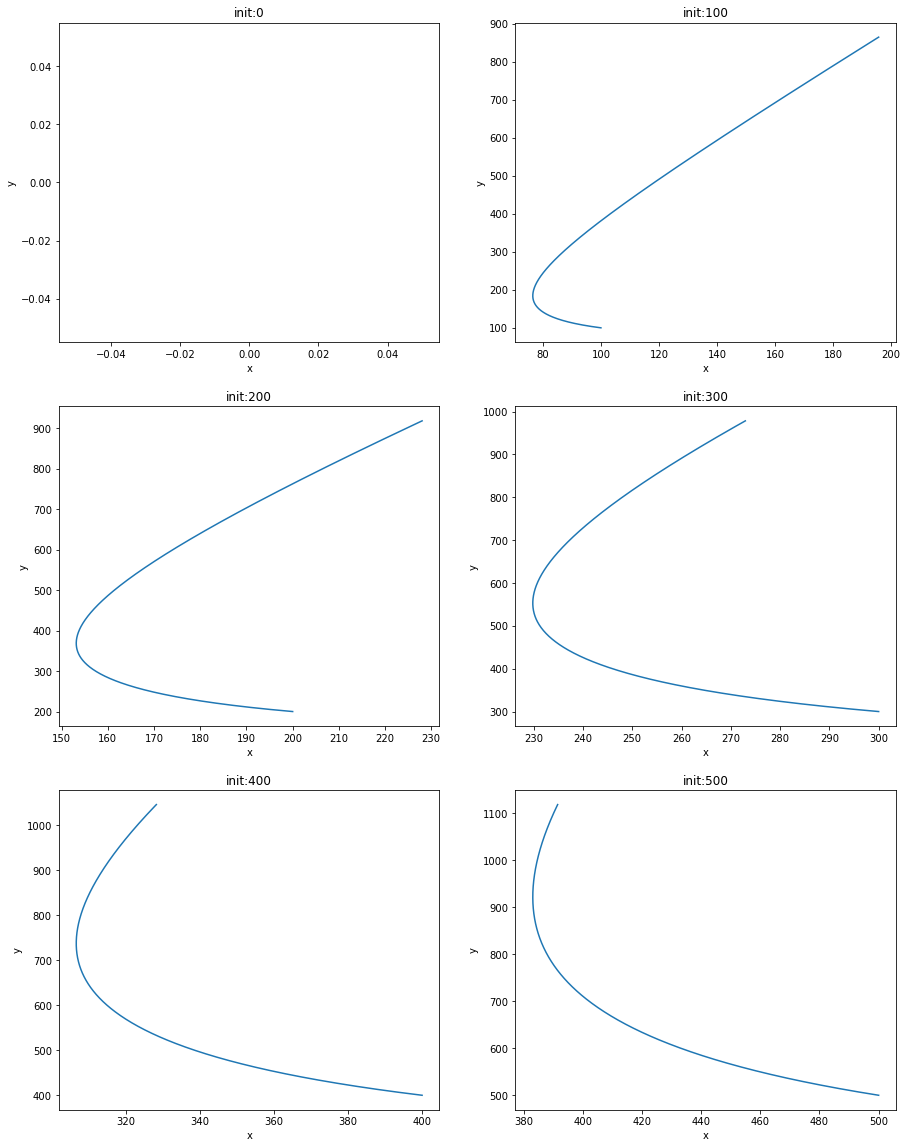

In [17]:
theta = 0.12547 * np.pi

fig, axes = plt.subplots(3, 2, figsize=(15, 20))
for init in range(0, 501, 100):
    x, y, r = fuction2d(init, theta)
    
    axes[init//200, (init//100)%2].plot(x, y)
    axes[init//200, (init//100)%2].set_xlabel("x")
    axes[init//200, (init//100)%2].set_ylabel("y")
    axes[init//200, (init//100)%2].set_title("init:"+str(init))

plt.show()

* 